In [6]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import os
import ProbabilisticParcellation.util as ut
from copy import deepcopy
import torch as pt


ut.figure_dir = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(ut.figure_dir):
    ut.figure_dir = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"


## Explore functional profiles of the tongue region

In [2]:
Data, regions = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


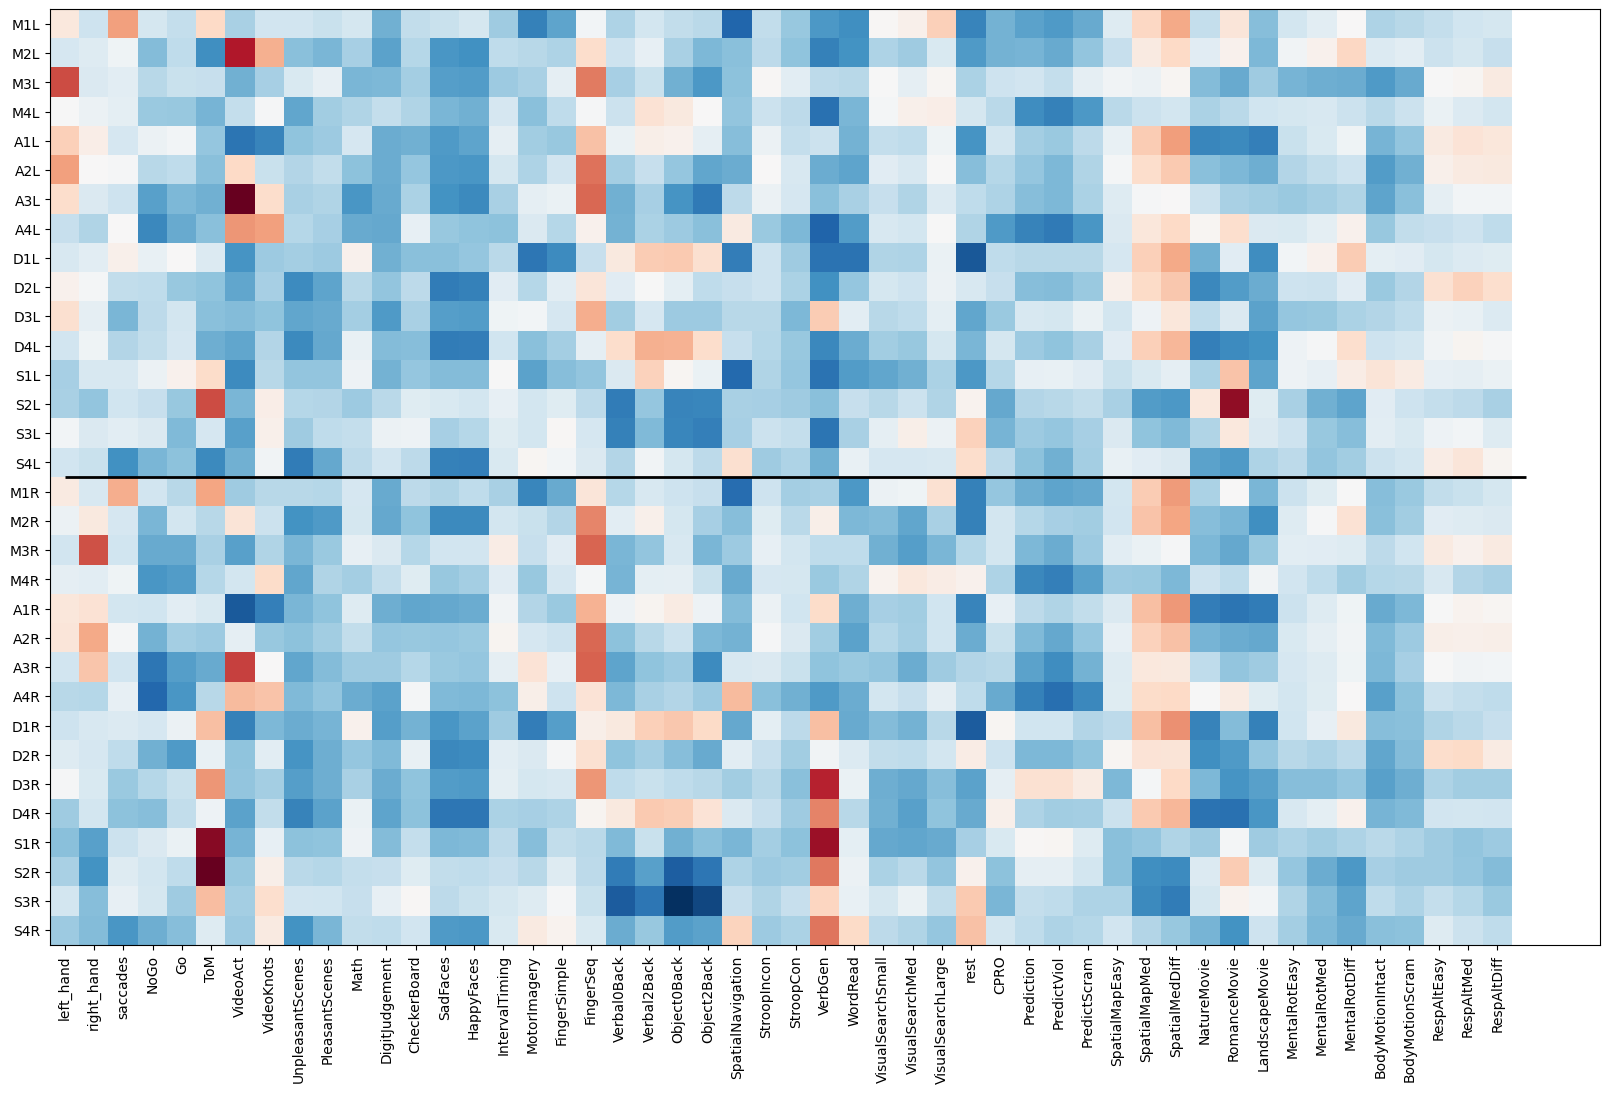

In [3]:
# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)


# Compare with action regions

In [91]:
motor_regions = ['M1L','M1R','M2L','M2R','M3L','M3R','M4L','M4R']
# reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.5,0.3261,1.0],[0.8166,0.1178,0.5079]]
action_regions = ['A1L','A1R','A2L','A2R','A3L','A3R','A4L','A4R']

In [92]:
def normalize(data, axis=0):
    """Normalize data by subtracting the mean of each column and dividing by the standard deviation.
    """
    data = deepcopy(data)
    data -= data.mean(axis=axis)
    data /= data.std(axis=axis)

    return data

([<matplotlib.axis.XTick at 0x7fd5aa6edd30>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

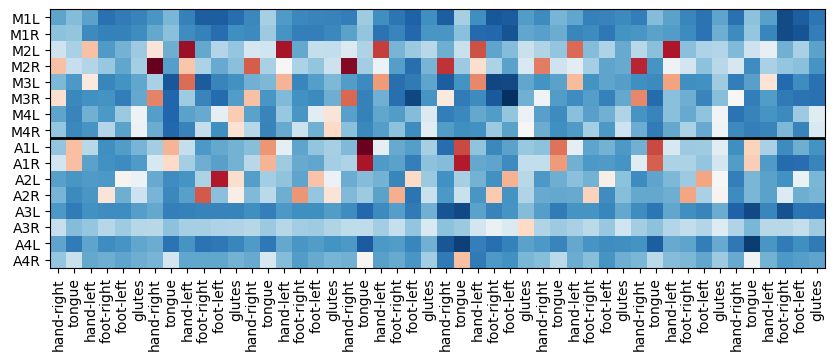

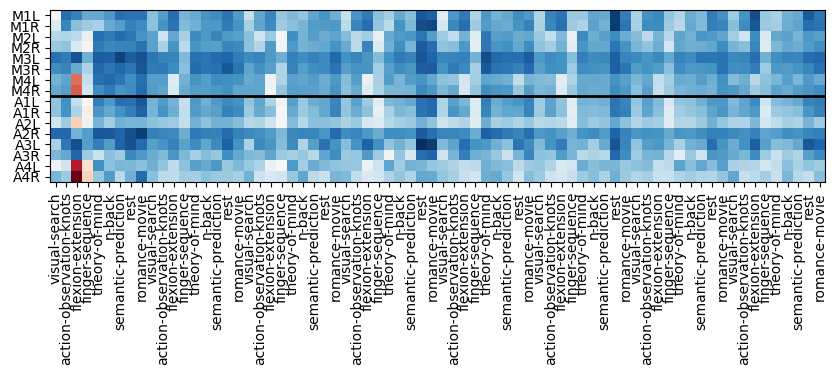

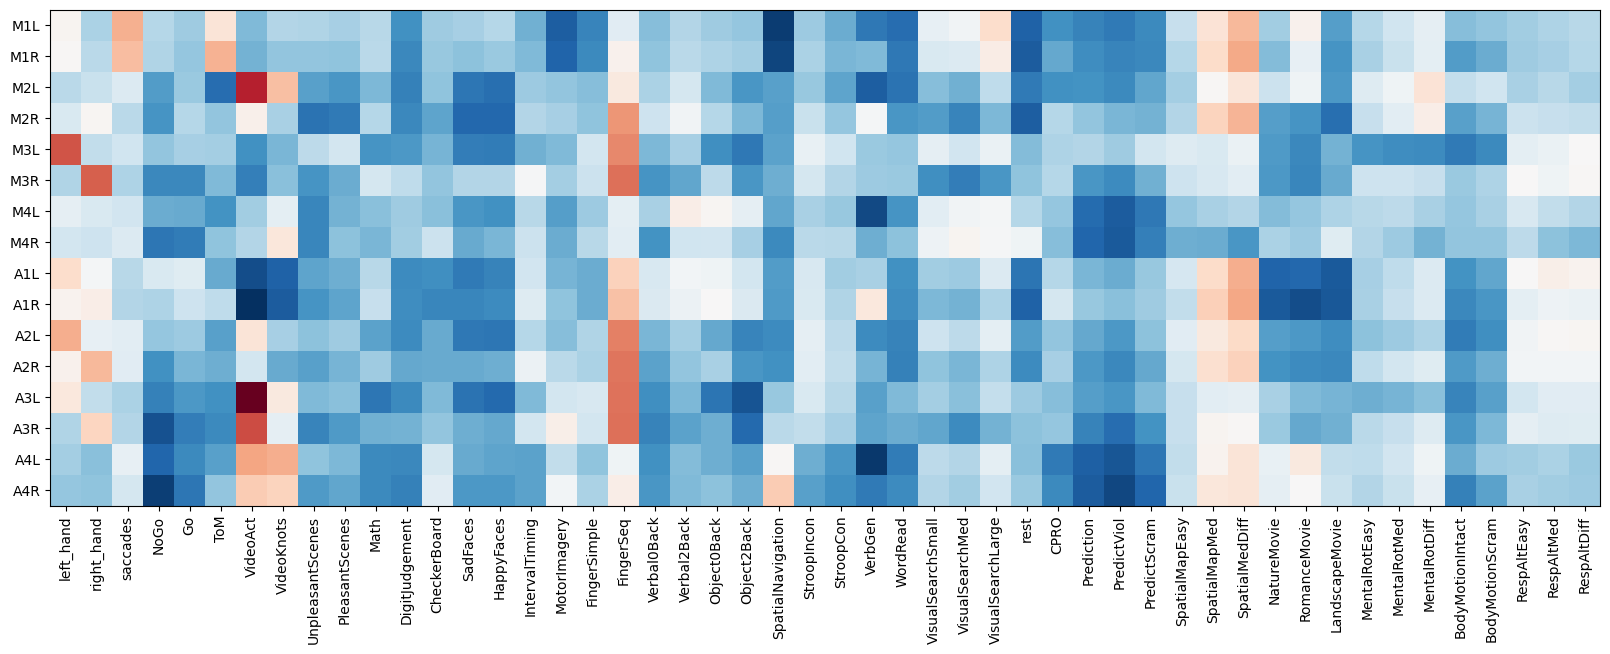

In [93]:
Data_all = pd.read_csv(ut.export_dir + '/Profiles/' +
                'NettekovenSym32_profile_individ.tsv', delimiter='\t')
Somatotopic = Data_all[Data_all.dataset == 'Somatotopic']
# Zstandardize columns
# Somatotopic[regions] = normalize(Somatotopic[regions])

Pontine = Data_all[Data_all.dataset == 'Pontine']
# Pontine[regions] = normalize(Pontine[regions])

IBC = Data_all[Data_all.dataset == 'IBC']
# IBC[regions] = normalize(IBC[regions])

Nishimoto = Data_all[Data_all.dataset == 'Nishimoto']
# Nishimoto[regions] = normalize(Nishimoto[regions])

select_regions = motor_regions + action_regions
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic.condition.tolist())),
           Somatotopic.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Somatotopic.index.tolist()) - 0.5, color='black', linewidth=2)

plt.figure(figsize=(10, 10))
plt.imshow(Pontine[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Pontine.condition.tolist())),
           Pontine.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Pontine.index.tolist())-0.5, color='black', linewidth=2)

plt.figure(figsize=(20, 20))
plt.imshow(Features.loc[select_regions], cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Features.loc[select_regions].columns.tolist())),
           Features.loc[select_regions].columns.tolist(), rotation=90)


([<matplotlib.axis.XTick at 0x7fd5cc3f03d0>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

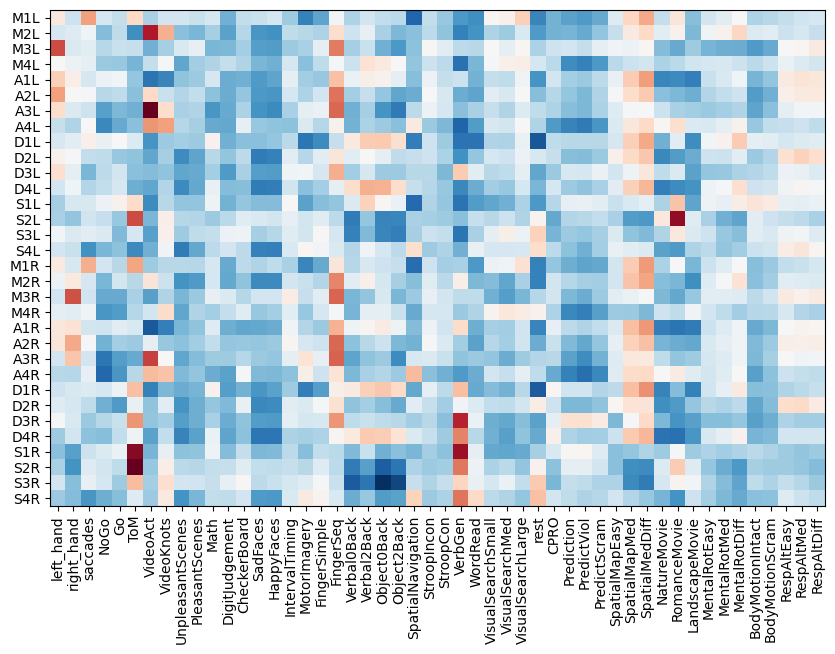

In [94]:
# Only select rows where the region is in the list
Feature_regions = Features.loc[regions]
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(10, 10))
plt.imshow(Features.loc[regions], cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)



/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1428232048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IBC_avg = IBC.groupby('condition').mean()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1428232048.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nishimoto_avg = Nishimoto.groupby('condition').mean()


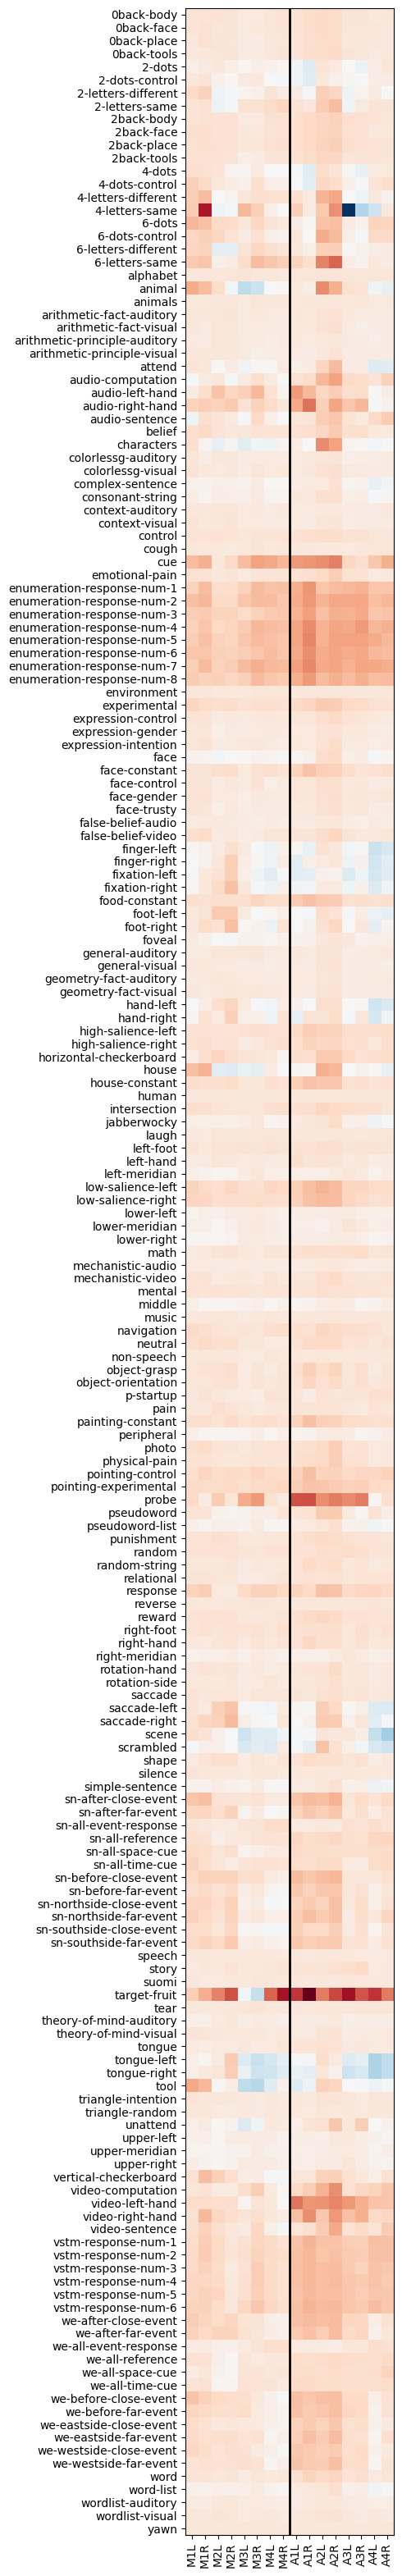

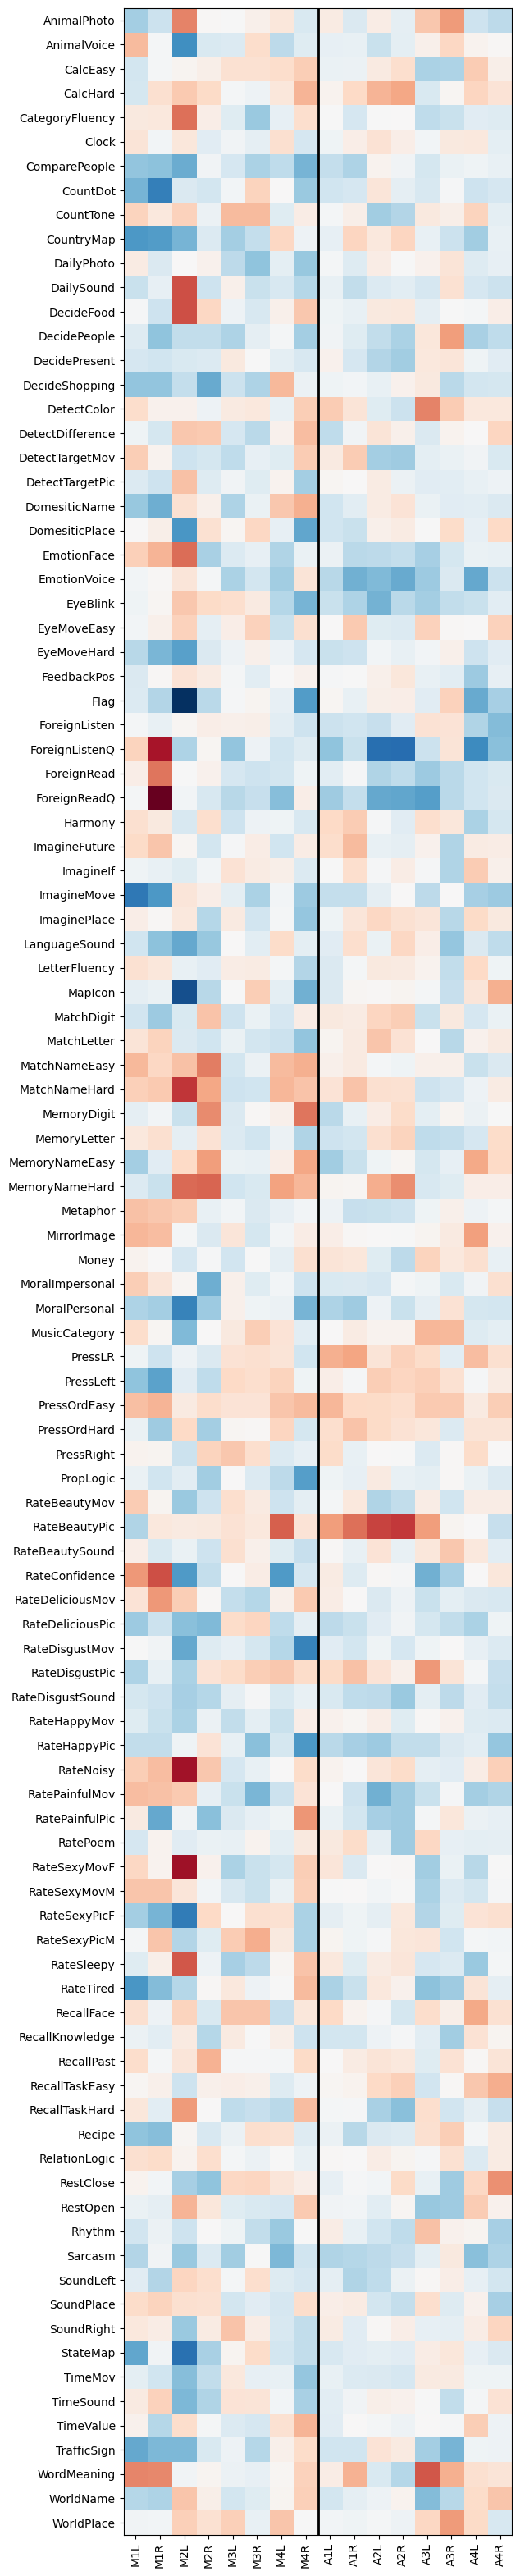

In [96]:
IBC_avg = IBC.groupby('condition').mean()
# IBC_avg[regions] = normalize(IBC_avg[regions])

Nishimoto_avg = Nishimoto.groupby('condition').mean()
# Nishimoto_avg[regions] = normalize(Nishimoto_avg[regions])
# --- IBC & Nishimoto ----
plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(IBC_avg.index.tolist())),
           IBC_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
                len(IBC_avg.index.tolist()) - 0.5, color='black', linewidth=2)

select_regions = motor_regions + action_regions
plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(Nishimoto_avg.index.tolist())),
           Nishimoto_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
              len(Nishimoto_avg.index.tolist()) - 0.5, color='black', linewidth=2)

## A1 vermal & lateral component (individual)

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1095984554.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IBC_avg_v = IBC_v.groupby('condition').mean()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1095984554.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()


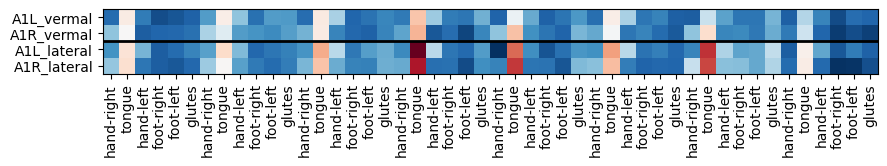

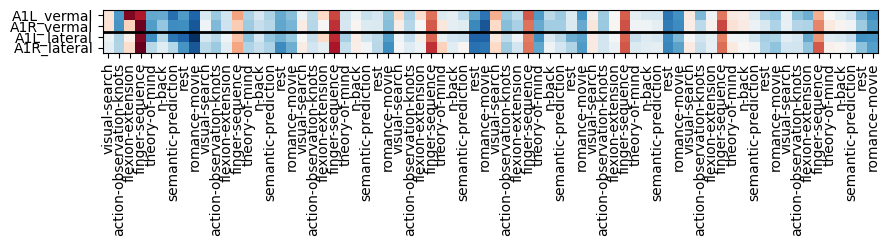

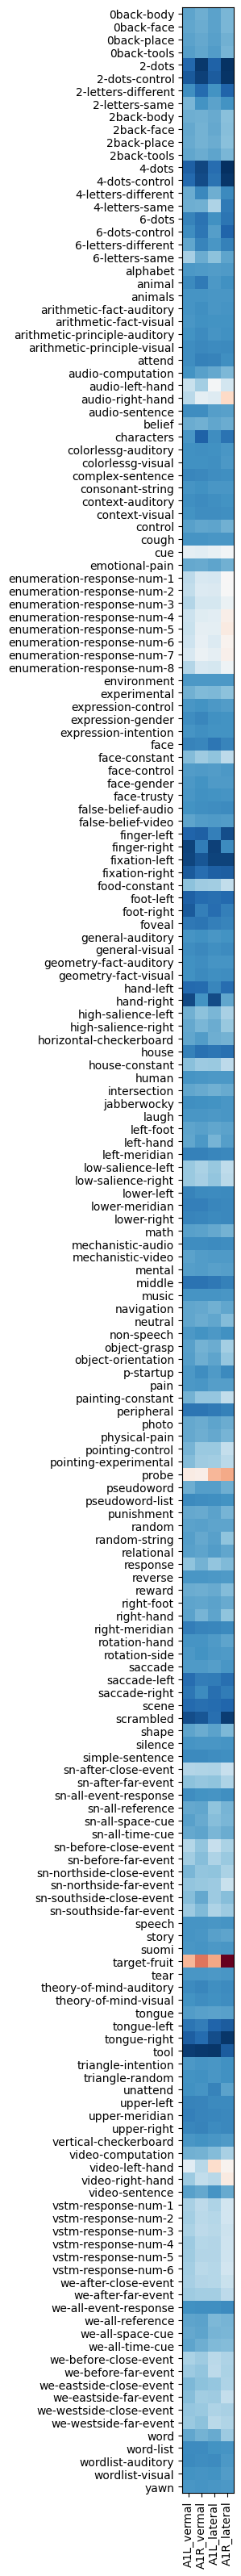

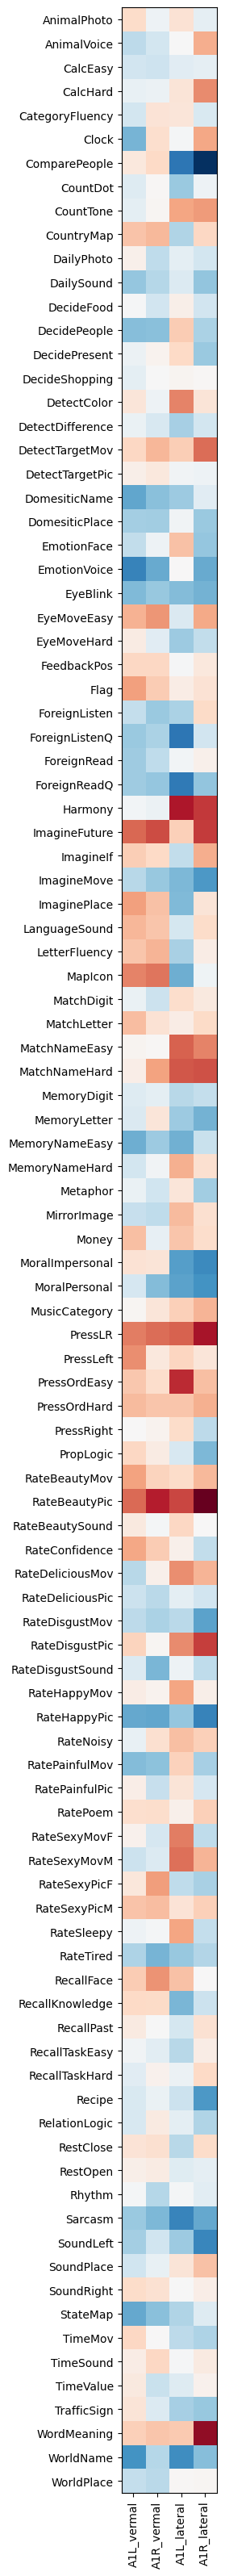

In [100]:
Data_verm = pd.read_csv(ut.export_dir + '/Profiles/' +
                       'NettekovenSym32_profile_individ_vermal_lateral.tsv', delimiter='\t')

regions_v = ['A1L_vermal', 'A1R_vermal', 'A1L_lateral', 'A1R_lateral']

Somatotopic_v = Data_verm[Data_verm.dataset == 'Somatotopic']
# Somatotopic_v[regions_v] = normalize(Somatotopic_v[regions_v])

Pontine_v = Data_verm[Data_verm.dataset == 'Pontine']
# Pontine_v[regions_v] = normalize(Pontine_v[regions_v])

IBC_v = Data_verm[Data_verm.dataset == 'IBC']
# IBC_v[regions_v] = normalize(IBC_v[regions_v])

Nishimoto_v = Data_verm[Data_verm.dataset == 'Nishimoto']
# Nishimoto_v[regions_v] = normalize(Nishimoto_v[regions_v])

plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_v[regions_v].T, cmap=cmap)
plt.yticks(np.arange(len(regions_v)), regions_v)
plt.xticks(np.arange(len(Somatotopic_v.condition.tolist())),
           Somatotopic_v.condition.tolist(), rotation=90)
plt.hlines(len(regions_v) / 2 - 0.5, -0.5,
           len(Somatotopic_v.index.tolist()) - 0.5, color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Somatotopic_vermal_lateral.png', dpi=300)

plt.figure(figsize=(10, 10))
plt.imshow(Pontine_v[regions_v].T, cmap=cmap)
plt.yticks(np.arange(len(regions_v)), regions_v)
plt.xticks(np.arange(len(Pontine_v.condition.tolist())),
           Pontine_v.condition.tolist(), rotation=90)
plt.hlines(len(regions_v) / 2 - 0.5, -0.5,
           len(Pontine_v.index.tolist()) - 0.5, color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Pontine_vermal_lateral.png', dpi=300)

# Plot IBC & Nishimoto
IBC_avg_v = IBC_v.groupby('condition').mean()
Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()

plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg_v[regions_v], cmap=cmap)
plt.xticks(np.arange(len(regions_v)), regions_v, rotation=90)
plt.yticks(np.arange(len(IBC_avg_v.index.tolist())),
           IBC_avg_v.index.tolist())
plt.savefig(ut.figure_dir + 'IBC_vermal_lateral.png', dpi=300)
# plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
#            len(IBC.index.tolist()) - 0.5, color='black', linewidth=2)

plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg_v[regions_v], cmap=cmap)
plt.xticks(np.arange(len(regions_v)), regions_v, rotation=90)
plt.yticks(np.arange(len(Nishimoto_avg_v.index.tolist())),
           Nishimoto_avg_v.index.tolist())
plt.savefig(ut.figure_dir + 'Nishimoto_vermal_lateral.png', dpi=300)
# plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
#            len(Nishimoto.index.tolist()) - 0.5, color='black', linewidth=2)


In [98]:
# pass
# ut.export_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'

# file = 'NettekovenSym32_profile_individ'
# D = pd.read_csv(ut.export_dir + 'Profiles/' +
#                 file + '.tsv', delimiter='\t')


# data_v = pd.read_csv(ut.export_dir + 'Profiles/' +
#                 'NettekovenSym32_profile_individ_vermal_lateral.tsv', delimiter='\t')

# # Concatenate horizontally
# # Drop A1L and A1R column from D
# D = D.drop(['A1L', 'A1R'], axis=1)
# data_v = data_v.drop(['dataset', 'session', 'condition', 'participant_id', 'participant_num'], axis=1)
# data_new = pd.concat([D, data_v], axis=1)

# data_new.to_csv(ut.export_dir + 'Profiles/' +
#                 'NettekovenSym32_profile_individ_A1split.tsv', sep="\t", index=False)


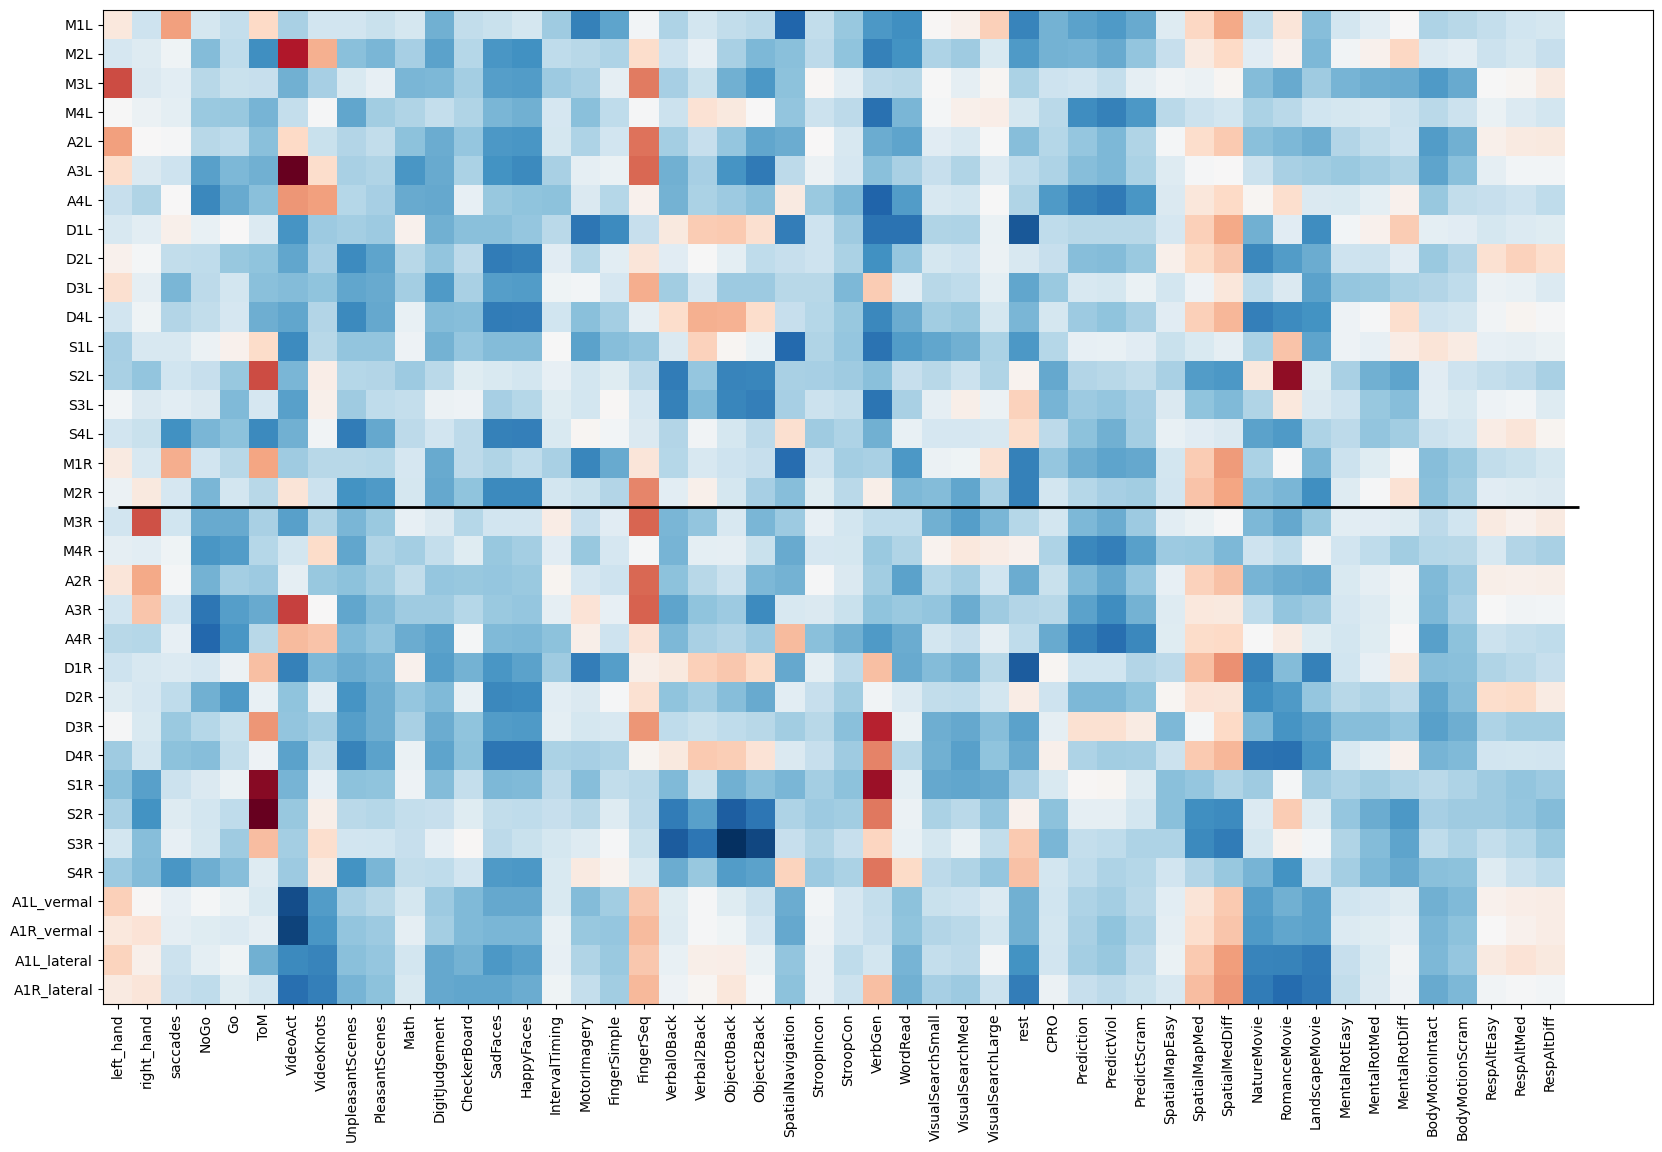

In [99]:
regions_split = deepcopy(regions)
regions_split.remove('A1L')
regions_split.remove('A1R')
regions_split = regions_split + regions_v
Data_v, regions_split = fm.load_profiles(
    file=f"NettekovenSym32_profile_individ_A1split", regions=regions_split)
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data_v)
task_matrix, task_codes = fm.task_indicator(Data_v)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data_v[regions_split], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions_split)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions_split)), regions_split)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions_split) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Features_vermal_lateral.png', dpi=300)


## A1 vermal & lateral component (group)

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_33832/1420323230.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IBC_avg_v = IBC_v.groupby('condition').mean()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_33832/1420323230.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()


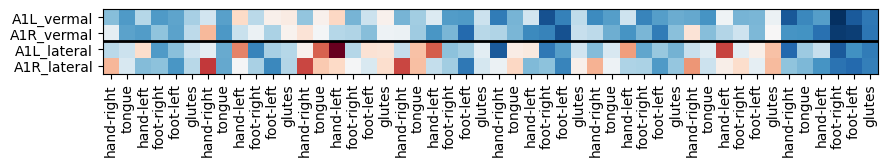

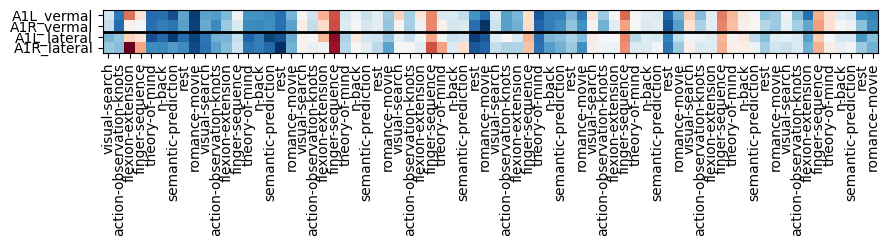

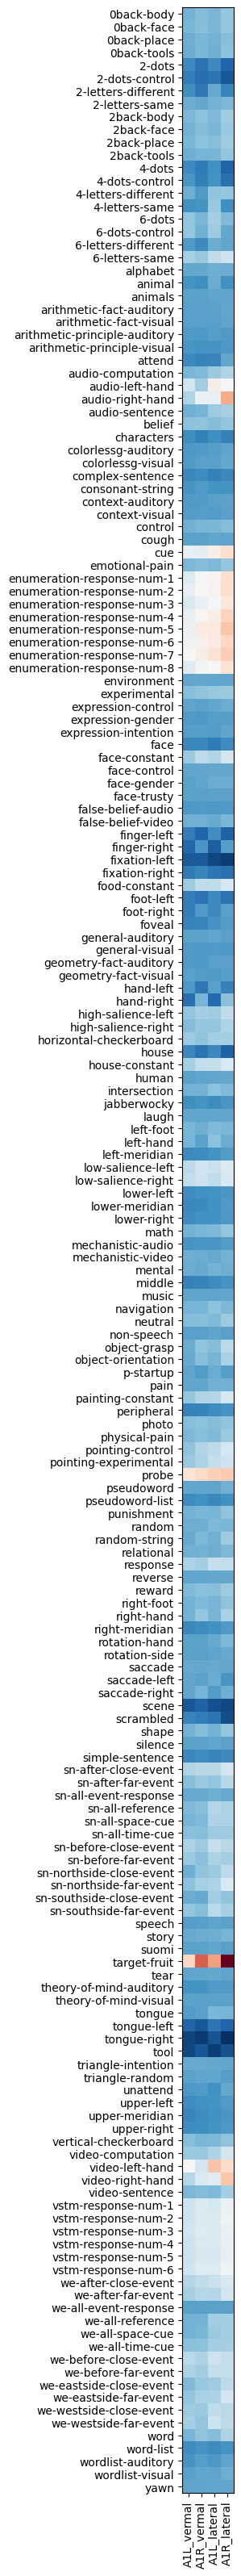

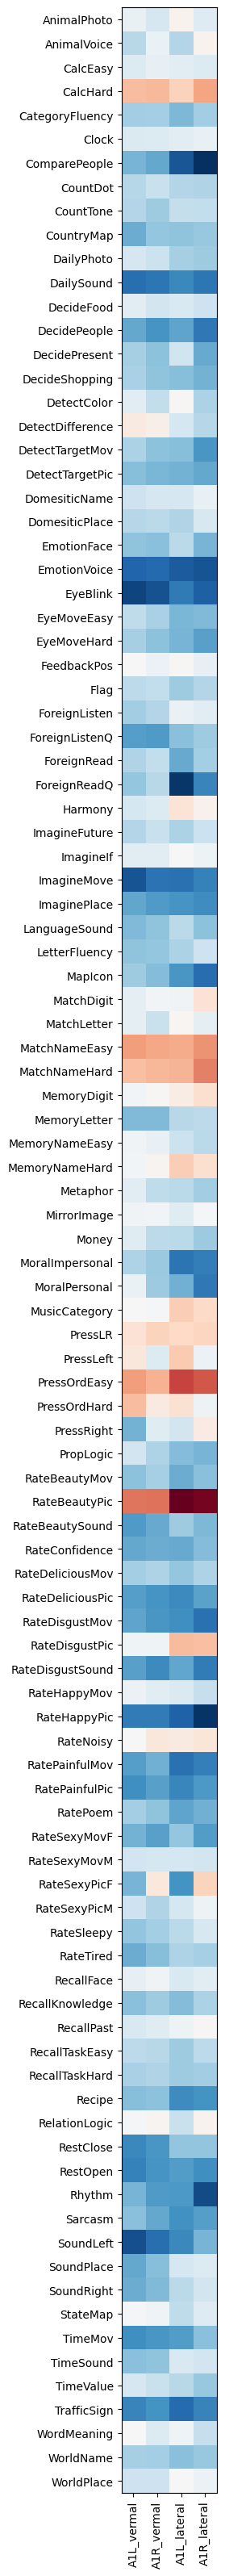

In [8]:
Data_verm = pd.read_csv(ut.export_dir + '/Profiles/' +
                        'NettekovenSym32_profile_group_vermal_lateral.tsv', delimiter='\t')

regions_v = ['A1L_vermal', 'A1R_vermal', 'A1L_lateral', 'A1R_lateral']

Somatotopic_v = Data_verm[Data_verm.dataset == 'Somatotopic']
# Somatotopic_v[regions_v] = normalize(Somatotopic_v[regions_v])

Pontine_v = Data_verm[Data_verm.dataset == 'Pontine']
# Pontine_v[regions_v] = normalize(Pontine_v[regions_v])

IBC_v = Data_verm[Data_verm.dataset == 'IBC']
# IBC_v[regions_v] = normalize(IBC_v[regions_v])

Nishimoto_v = Data_verm[Data_verm.dataset == 'Nishimoto']
# Nishimoto_v[regions_v] = normalize(Nishimoto_v[regions_v])

plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_v[regions_v].T, cmap=cmap)
plt.yticks(np.arange(len(regions_v)), regions_v)
plt.xticks(np.arange(len(Somatotopic_v.condition.tolist())),
           Somatotopic_v.condition.tolist(), rotation=90)
plt.hlines(len(regions_v) / 2 - 0.5, -0.5,
           len(Somatotopic_v.index.tolist()) - 0.5, color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Somatotopic_vermal_lateral.png', dpi=300)

plt.figure(figsize=(10, 10))
plt.imshow(Pontine_v[regions_v].T, cmap=cmap)
plt.yticks(np.arange(len(regions_v)), regions_v)
plt.xticks(np.arange(len(Pontine_v.condition.tolist())),
           Pontine_v.condition.tolist(), rotation=90)
plt.hlines(len(regions_v) / 2 - 0.5, -0.5,
           len(Pontine_v.index.tolist()) - 0.5, color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Pontine_vermal_lateral.png', dpi=300)

# Plot IBC & Nishimoto
IBC_avg_v = IBC_v.groupby('condition').mean()
Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()

plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg_v[regions_v], cmap=cmap)
plt.xticks(np.arange(len(regions_v)), regions_v, rotation=90)
plt.yticks(np.arange(len(IBC_avg_v.index.tolist())),
           IBC_avg_v.index.tolist())
plt.savefig(ut.figure_dir + 'IBC_vermal_lateral.png', dpi=300)
# plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
#            len(IBC.index.tolist()) - 0.5, color='black', linewidth=2)

plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg_v[regions_v], cmap=cmap)
plt.xticks(np.arange(len(regions_v)), regions_v, rotation=90)
plt.yticks(np.arange(len(Nishimoto_avg_v.index.tolist())),
           Nishimoto_avg_v.index.tolist())
plt.savefig(ut.figure_dir + 'Nishimoto_vermal_lateral.png', dpi=300)
# plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
#            len(Nishimoto.index.tolist()) - 0.5, color='black', linewidth=2)


# MDTB Task evoked responses with A1 split

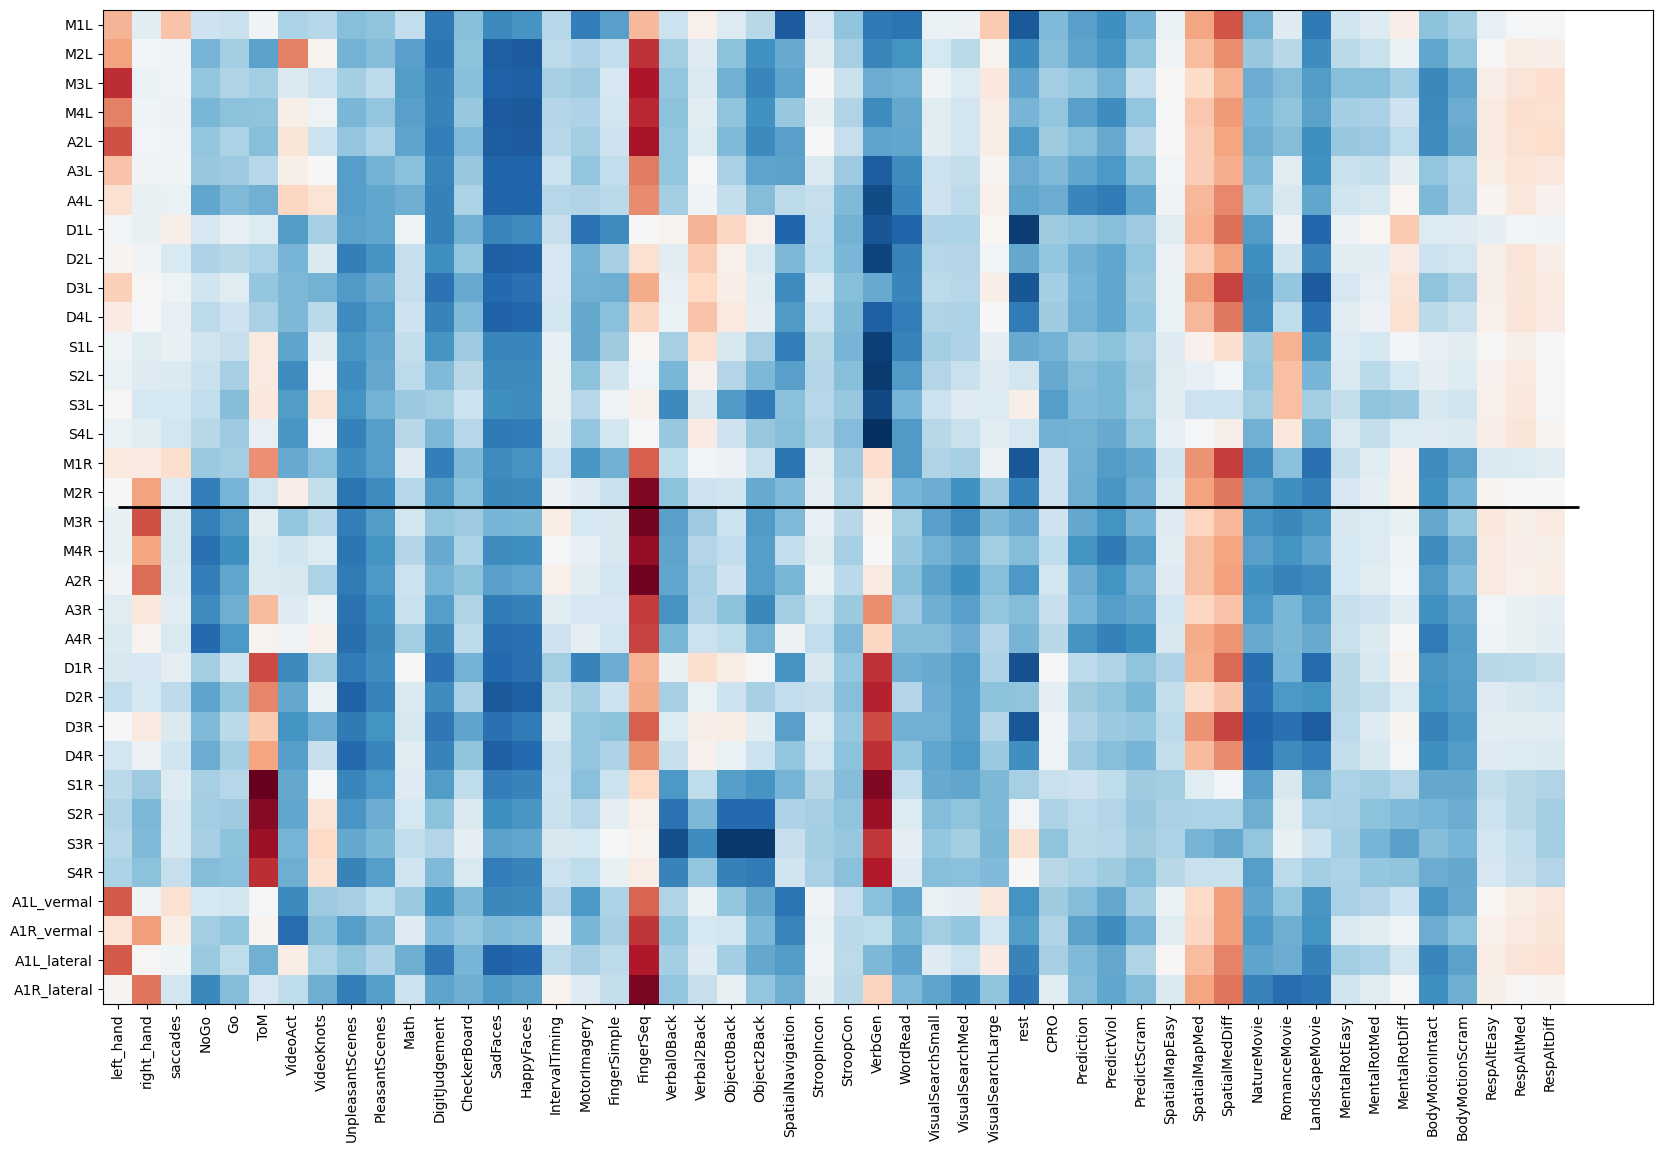

In [9]:
regions_split = deepcopy(regions)
regions_split.remove('A1L')
regions_split.remove('A1R')
regions_split = regions_split + regions_v
Data_v, regions_split = fm.load_profiles(
    file=f"NettekovenSym32_profile_group_A1split", regions=regions_split)
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data_v)
task_matrix, task_codes = fm.task_indicator(Data_v)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data_v[regions_split], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions_split)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions_split)), regions_split)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions_split) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Features_vermal_lateral.png', dpi=300)
